# Medical-MNSIT CNN

code from https://www.kaggle.com/sarimsikander/medical-mnist-cnn-99-96-accuracy

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tqdm import tqdm
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import cv2
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Model
from tensorflow.keras import callbacks

%matplotlib inline

In [2]:
path='/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/'

In [3]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/000597.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/004472.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/006620.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/005044.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/004272.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008347.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/001218.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/004185.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/001449.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/001924.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medic

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/006331.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008601.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/004823.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008369.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/007488.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/009524.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/003555.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008008.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/002517.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/002873.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medic

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/001636.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008108.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/002775.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/009678.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/009334.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/001701.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/005195.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/006260.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/002251.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/005527.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medic

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/000787.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/003333.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008722.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008129.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/001524.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/005660.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/000796.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/005993.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/007180.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/009220.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medic

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/005606.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/009193.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/003359.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/006002.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008147.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/008644.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/001605.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/009989.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/006034.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/Hand/002099.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medic

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/008133.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/002187.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/008269.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/004502.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/007720.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/003660.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/006262.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/008506.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/002924.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/001778.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtt

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/005505.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/006535.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/007097.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/005510.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/004373.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/007178.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/000437.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/006143.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/008026.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/007573.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtt

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/007367.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/005178.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/008049.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/003161.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/009331.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/001907.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/003222.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/005023.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/006197.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/006541.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtt

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/004789.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/005588.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/004608.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/005958.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/002724.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/005116.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/003749.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/003073.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/008874.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/HeadCT/000355.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtt

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/006267.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/002003.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/009390.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/002712.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/002485.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/004157.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/009248.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/007462.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/003745.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/004911.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/a

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/007636.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/004196.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/009225.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/009183.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/009045.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/007717.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/000250.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/003679.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/004592.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/004381.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/a

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/005164.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/002227.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/000397.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/005438.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/005069.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/002045.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/005451.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/008006.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/003321.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/002360.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/a

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/005769.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/001069.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/007459.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/002274.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/007276.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/007080.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/006887.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/001527.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/006007.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/CXR/003196.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/a

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000246.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/001335.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/007106.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/005233.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/006825.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000035.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/008245.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/002647.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/004450.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000663.jpeg
/home/alb

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000255.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/001209.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/002542.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/002882.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000771.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/005499.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/008209.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/001013.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/004377.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/003573.jpeg
/home/alba

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000462.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/003525.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000984.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/004126.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/001794.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/001433.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/005388.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/007584.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/000816.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/006865.jpeg
/home/alba

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/007290.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/004740.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/004493.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/007109.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/007657.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/002942.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/005785.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/005745.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/006015.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/BreastMRI/002194.jpeg
/home/alba

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002917.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/009681.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002973.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002355.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/001080.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002705.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/003342.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/006993.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/007900.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/009119.jpeg
/home/alba/Documents/HIC_Dunde

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/004343.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/008781.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/006524.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/008575.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/007873.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/008758.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/007960.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002600.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/001417.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/003249.jpeg
/home/alba/Documents/HIC_Dunde

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/007703.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/008154.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/009608.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002044.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/009764.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/008253.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002793.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/008866.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/004257.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/001751.jpeg
/home/alba/Documents/HIC_Dunde

/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/006040.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/001568.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/006921.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/008609.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/003246.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/005114.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/002654.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/001439.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/007655.jpeg
/home/alba/Documents/HIC_Dundee/GRAIMAtter/data/kaggle-medical-mnist/archive/ChestCT/003026.jpeg
/home/alba/Documents/HIC_Dunde

In [9]:
classes = {'AbdomenCT': 0, 'BreastMRI': 1, 'ChestCT': 2, 'CXR': 3, 'Hand': 4, 'HeadCT': 5}

In [5]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE=64
N_CLASSES = 6
EPOCHS = 5

In [6]:
abdomen_DIR=path+'AbdomenCT'
breastmri_DIR=path+'BreastMRI'
chestct_DIR=path+'ChestCT'
cxr_DIR=path+'CXR'
hand_DIR=path+'Hand'
headct = path+'HeadCT'

In [7]:
def assign_label(img,class_type):
    return class_type

X = []
y = []

def make_train_data(class_type,DIR):
    #print(DIR)
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,class_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        
        X.append(np.array(img))
        y.append(str(label))


In [10]:
make_train_data(classes.get('AbdomenCT'), abdomen_DIR)

100%|██████████| 10000/10000 [02:09<00:00, 77.35it/s] 


In [11]:
make_train_data(classes.get('BreastMRI'), breastmri_DIR)

100%|██████████| 8954/8954 [01:54<00:00, 77.88it/s] 


In [12]:
make_train_data(classes.get('ChestCT'), chestct_DIR)

100%|██████████| 10000/10000 [02:04<00:00, 80.16it/s]


In [13]:
make_train_data(classes.get('CXR'), cxr_DIR)

100%|██████████| 10000/10000 [02:16<00:00, 73.13it/s]


In [14]:
make_train_data(classes.get('Hand'), hand_DIR)

100%|██████████| 10000/10000 [01:57<00:00, 85.38it/s]


In [15]:
make_train_data(classes.get('HeadCT'), headct)

100%|██████████| 10000/10000 [02:19<00:00, 71.77it/s]


In [16]:
len(X)
y = np.array(y)
X = np.array(X)
X.shape

(60310, 64, 64, 3)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.1, random_state=58954)

In [18]:
k = len(set(y_train))
print("Number of classes, ", k)

Number of classes,  6


In [19]:
X_train = X_train.astype('float64')/255
X_test = X_test.astype('float64')/255

In [20]:
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

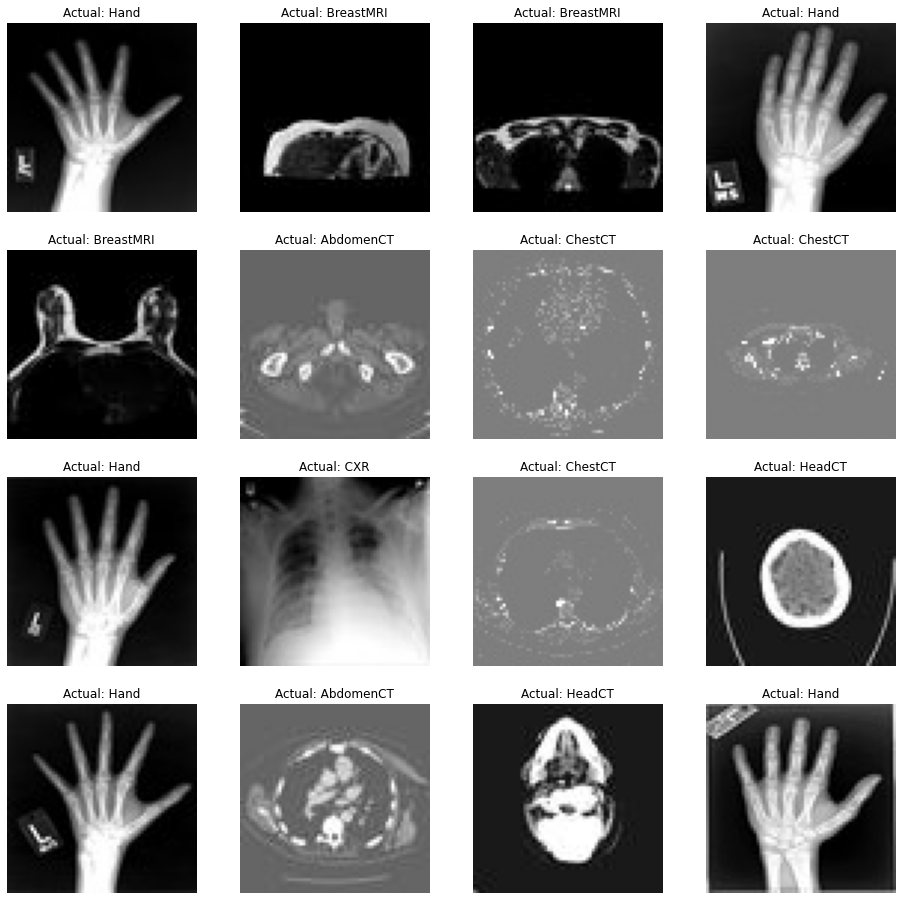

In [21]:
labels = '''AbdomenCT
BreastMRI
ChestCT
CXR
Hand
HeadCT'''.split("\n")

plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,16):
    plt.subplot(4,4,j); j+=1
    plt.imshow(X_train[i],cmap = 'Greys')
    plt.axis('off')
    plt.title("Actual: {}".format(labels[np.argmax(y_train[i])]))
    #plt.title('{} / {}'.format(labels[y_train[i]],y_train[i]))


In [22]:
i = layers.Input(shape = (X_train[0].shape))
x = layers.Conv2D(64, (3,3), activation='relu', strides = (2,2), padding= 'same')(i)
x = layers.Conv2D(64, (3,3), activation='relu', strides = (2,2), padding= 'same')(x)
x = layers.Conv2D(32, (3,3), activation='relu', strides = (2,2), padding= 'same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(k, activation='softmax')(x)

model = Model(i, x)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=3, min_lr=0.00001)

model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data=  (X_test,y_test), callbacks=[reduce_lr])

Epoch 1/5
849/849 [==============================] - 108s 117ms/step - loss: 0.0704 - accuracy: 0.9762 - val_loss: 0.0083 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 2/5
849/849 [==============================] - 99s 116ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.0341 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 3/5
849/849 [==============================] - 106s 124ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0055 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 4/5
849/849 [==============================] - 103s 122ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0070 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 5/5
849/849 [==============================] - 99s 117ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9987 - lr: 0.0010


The class of this is: 4


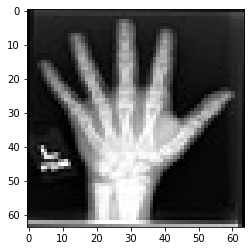

In [25]:
print("The class of this is: {}".format(np.argmax(y_train[10])))
plt.imshow(X_train[10], cmap='gray')
plt.show()

Confusion matrix, without normalization
[[1167    0    0    0    0    0]
 [   0  869    0    0    0    0]
 [   0    0  978    0    0    0]
 [   0    0    0 1038    2    0]
 [   0    1    0    5  984    0]
 [   0    0    0    0    0  987]]


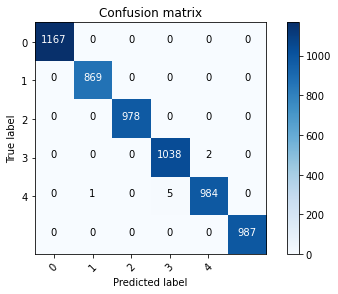

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(np.argmax(y_test, axis= 1), p_test)
plot_confusion_matrix(cm, list(range(5)))

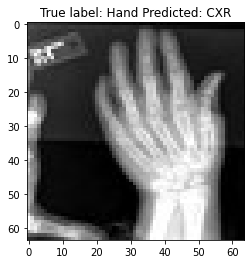

In [27]:
misclassified_idx = np.where(p_test != np.argmax(y_test, axis= 1))[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[np.argmax(y_test[i])], labels[p_test[i]]));